In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
#FG%
#ORB
#DRB
#TRBPTS


#PART A
file='2017.xls'
df = pd.read_excel(file)
fg = list(df['FG%'][1:])
trb = list(df['TRB'][1:])
trainx=np.transpose(np.vstack((fg, trb)))
#print(trainx.shape)
#print(trb)
pts = list(df['PTS'][1:])


beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(trainx),trainx)),np.matmul(np.transpose(trainx),pts))


print(beta)



#we can see that weight for TRB is very less. Hence, TRB is less important feature compared to FG%

[165.62434772   0.68659874]


In [3]:
#PART B

file='2017.xls'
df = pd.read_excel(file)
fg = list(df['FG%'][1:])
trb = list(df['TRB'][1:])
orb = list(df['ORB'][1:])
drb = list(df['DRB'][1:])
trainx=np.transpose(np.vstack((fg, trb,orb,drb)))
#print(trainx)
#print(trb)
pts = list(df['PTS'][1:])


beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(trainx),trainx)),np.matmul(np.transpose(trainx),pts))


print(beta)


[162.50582183   2.73594995  -2.11125196  -1.98843192]


mape % ->  1.5294427292040496
sse ->  139.46621778218994


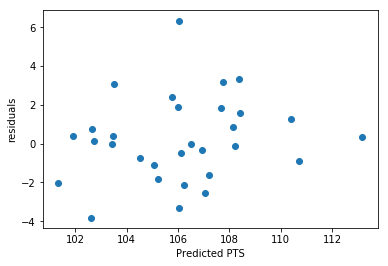

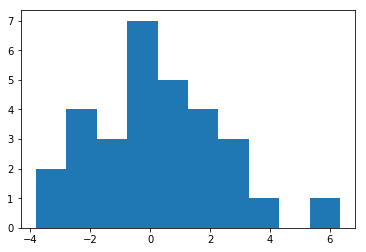

mape % ->  1.8610517990239506
sse ->  199.14276433206484


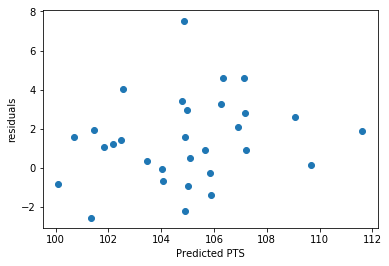

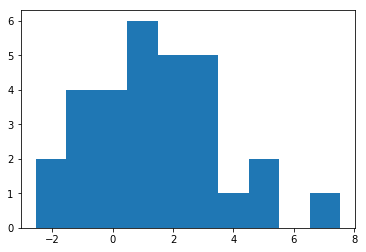

mape % ->  3.6104026698845564
sse ->  601.7989452580179


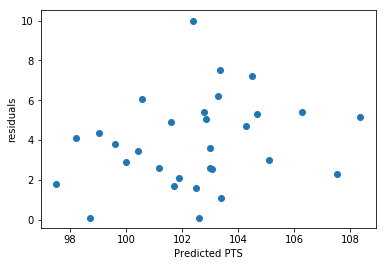

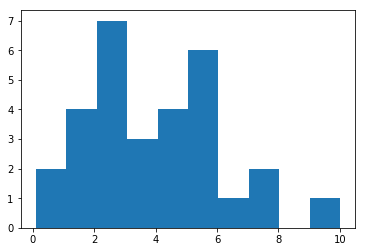

In [4]:
#PART C

file='2017.xls'
df = pd.read_excel(file)
fg = list(df['FG%'][1:])
trb = list(df['TRB'][1:])

trainx=np.transpose(np.vstack((fg, trb)))
pts = list(df['PTS'][1:])
beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(trainx),trainx)),np.matmul(np.transpose(trainx),pts))
#print(beta)

file='2018.xls'
df = pd.read_excel(file)
fg = list(df['FG%'][1:])
trb = list(df['TRB'][1:])
testx=np.transpose(np.vstack((fg, trb)))
testpts= list(df['PTS'][1:])
predpts=np.matmul(testx,beta)
#print(predpts)

mape=sum(np.divide(abs(np.subtract(predpts,testpts)),testpts))/len(testpts)
print("mape % -> ",mape*100 )

sse=sum(np.multiply(np.subtract(predpts,testpts),np.subtract(predpts,testpts)))
print("sse -> ",sse)

residuals= np.subtract(testpts,predpts)
plt.figure(0)
plt.scatter(predpts,residuals)
plt.xlabel('Predicted PTS')
plt.ylabel('residuals')
plt.figure(1)
#sns.distplot(residuals,kde=False)
x,y,z=plt.hist(residuals,10)
plt.show()

fg=[]
trb=[]
pts=[]
for i in range(2016,2018):
    file=str(i)+'.xls'
    #print(file)
    df = pd.read_excel(file)
    
    temp = list(df['FG%'][1:])
    fg=np.concatenate((fg,temp), axis=0)
    
    temp = list(df['TRB'][1:])
    trb=np.concatenate((trb,temp), axis=0)
    
    temp = list(df['PTS'][1:])
    pts=np.concatenate((pts,temp), axis=0)

trainx=np.transpose(np.vstack((fg, trb)))
#print(trainx.shape)
#print(pts.shape)
beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(trainx),trainx)),np.matmul(np.transpose(trainx),pts))
#print(beta)
predpts=np.matmul(testx,beta)

mape=sum(np.divide(abs(np.subtract(predpts,testpts)),testpts))/len(testpts)
print("mape % -> ",mape*100 )

sse=sum(np.multiply(np.subtract(predpts,testpts),np.subtract(predpts,testpts)))
print("sse -> ",sse)

residuals= np.subtract(testpts,predpts)
plt.figure(2)
plt.scatter(predpts,residuals)
plt.xlabel('Predicted PTS')
plt.ylabel('residuals')
plt.figure(3)
#sns.distplot(residuals,kde=False)
x,y,z=plt.hist(residuals,10)
plt.show()



fg=[]
trb=[]
pts=[]
for i in range(2010,2018):
    file=str(i)+'.xls'
    #print(file)
    df = pd.read_excel(file)
    
    temp = list(df['FG%'][1:])
    fg=np.concatenate((fg,temp), axis=0)
    
    temp = list(df['TRB'][1:])
    trb=np.concatenate((trb,temp), axis=0)
    
    temp = list(df['PTS'][1:])
    pts=np.concatenate((pts,temp), axis=0)

trainx=np.transpose(np.vstack((fg, trb)))
#print(trainx.shape)
#print(pts.shape)
beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(trainx),trainx)),np.matmul(np.transpose(trainx),pts))
#print(beta)
predpts=np.matmul(testx,beta)

mape=sum(np.divide(abs(np.subtract(predpts,testpts)),testpts))/len(testpts)
print("mape % -> ",mape*100 )

sse=sum(np.multiply(np.subtract(predpts,testpts),np.subtract(predpts,testpts)))
print("sse -> ",sse)

residuals= np.subtract(testpts,predpts)
plt.figure(2)
plt.scatter(predpts,residuals)
plt.xlabel('Predicted PTS')
plt.ylabel('residuals')
plt.figure(3)
#sns.distplot(residuals,kde=False)
x,y,z=plt.hist(residuals,10)
plt.show()

In [5]:
np.histogram([1, 2, 1], bins=[0, 1, 2, 3])

np.histogram(np.arange(4), bins=np.arange(5), density=True)

np.histogram([[1, 2, 1], [1, 0, 1]], bins=[0,1,2,3])

(array([1, 4, 1]), array([0, 1, 2, 3]))